**Image Processing full project on cat vs dog classification using CNN**

#Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#Importing the Dog vs Cat Dataset from Kaggle

In [3]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:06<00:00, 117MB/s]
100% 812M/812M [00:06<00:00, 126MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


#Printing the name of images

In [8]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.6541.jpg', 'cat.4269.jpg', 'dog.2134.jpg', 'dog.5498.jpg', 'dog.9991.jpg', 'dog.713.jpg', 'dog.1383.jpg', 'dog.7618.jpg', 'cat.9033.jpg', 'cat.9451.jpg', 'dog.2510.jpg', 'cat.3443.jpg', 'dog.11372.jpg', 'dog.2208.jpg', 'cat.11698.jpg', 'dog.4157.jpg', 'cat.3411.jpg', 'cat.4209.jpg', 'cat.8060.jpg', 'cat.1496.jpg', 'dog.6009.jpg', 'dog.4370.jpg', 'cat.5090.jpg', 'cat.11356.jpg', 'dog.742.jpg', 'dog.5959.jpg', 'cat.11444.jpg', 'cat.6866.jpg', 'cat.9462.jpg', 'cat.586.jpg', 'dog.11244.jpg', 'cat.11256.jpg', 'dog.8169.jpg', 'cat.5419.jpg', 'dog.9186.jpg', 'cat.9301.jpg', 'dog.3753.jpg', 'cat.1326.jpg', 'cat.4763.jpg', 'dog.9060.jpg', 'cat.11611.jpg', 'dog.10885.jpg', 'cat.6619.jpg', 'dog.2529.jpg', 'dog.655.jpg', 'cat.1189.jpg', 'cat.9804.jpg', 'dog.2288.jpg', 'dog.281.jpg', 'dog.11478.jpg', 'cat.7408.jpg', 'cat.2221.jpg', 'cat.2958.jpg', 'cat.1427.jpg', 'dog.10386.jpg', 'dog.7167.jpg', 'dog.11698.jpg', 'cat.6335.jpg', 'dog.2247.jpg', 'cat.3410.jpg', 'dog.12230.jpg', 'dog.7278.jpg', 

#Importing the Dependencies

In [43]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

#Displaying the images of dogs and cats

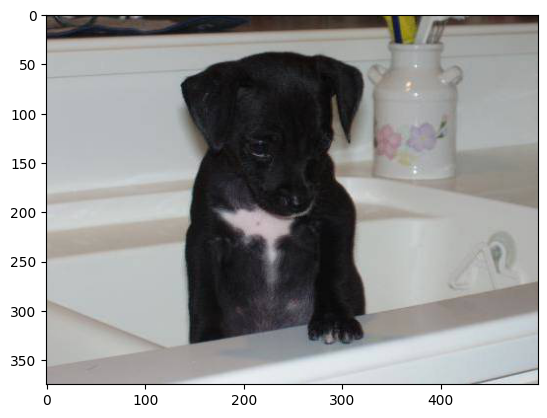

In [10]:
# display dog image
img = mpimg.imread('/content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

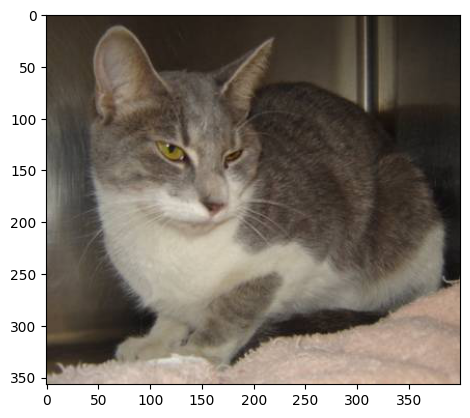

In [11]:
# display cat image
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])



dog
cat
dog
dog
dog


In [13]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


#Resizing all the images

In [14]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [15]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

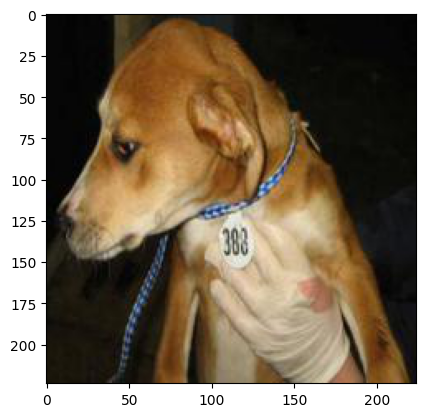

In [18]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.10006.jpg')
imgplt = plt.imshow(img)
plt.show()

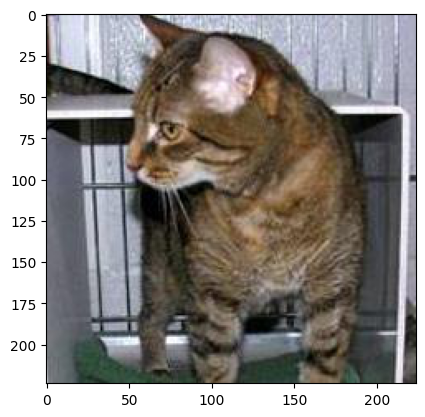

In [20]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.9950.jpg')
imgplt = plt.imshow(img)
plt.show()

#Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [21]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [22]:
print(filenames[0:5])
print(len(filenames))

['dog.6541.jpg', 'cat.4269.jpg', 'dog.2134.jpg', 'dog.5498.jpg', 'dog.9991.jpg']
2000


In [23]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 1]
2000


In [24]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 982 1018]


#Converting all the resized images to numpy arrays

In [25]:
import cv2
import glob

In [26]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 72 192 214]
   [ 72 192 214]
   [ 73 193 215]
   ...
   [175  92  60]
   [178  91  57]
   [175  88  54]]

  [[ 73 193 215]
   [ 73 193 215]
   [ 73 193 215]
   ...
   [172  89  57]
   [176  89  55]
   [176  89  55]]

  [[ 74 194 216]
   [ 74 194 216]
   [ 74 194 216]
   ...
   [168  85  53]
   [173  86  52]
   [175  88

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
Y = np.asarray(labels)

#Train Test Split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [33]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
print(X_train_scaled)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.69411765 0.75294118 0.76078431]
   [0.69803922 0.75686275 0.76470588]
   [0.69803922 0.75686275 0.76470588]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.69411765 0.75294118 0.76078431]
   [0.69411765 0.75294118 0.76078431]
   [0.69019608 0.74901961 0.75686275]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.69411765 0.75294118 0.76078431]
   [0.68627451 0.74509804 0.75294118]
   [0.68235294 0.74117647 0.74901961]]

  ...

  [[0.91372549 0.93333333 0.92941176]
   [0.9254902  0.94901961 0.94509804]
   [0.91764706 0.9372549  0.94117647]
   ...
   [0.92156863 0.94117647 0.94509804]
   [0.90588235 0.9254902  0.9372549 ]
   [0.89019608 0.90980392 0.91372549]]

  [[0.89411765 0.90588235 0.89803922]
   [0.9

#Building the Neural Network

In [35]:
import tensorflow as tf
import tensorflow_hub as hub

In [36]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [37]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [38]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [39]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 71s 1s/step - loss: 0.2096 - acc: 0.9169
Epoch 2/5
50/50 [==============================] - 63s 1s/step - loss: 0.0759 - acc: 0.9756
Epoch 3/5
50/50 [==============================] - 71s 1s/step - loss: 0.0563 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0440 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 65s 1s/step - loss: 0.0378 - acc: 0.9900


In [40]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 15s 1s/step - loss: 0.0542 - acc: 0.9775
Test Loss = 0.054238442331552505
Test Accuracy = 0.9775000214576721


#Predictive System

Path of the image to be predicted: /content/cat.jpg


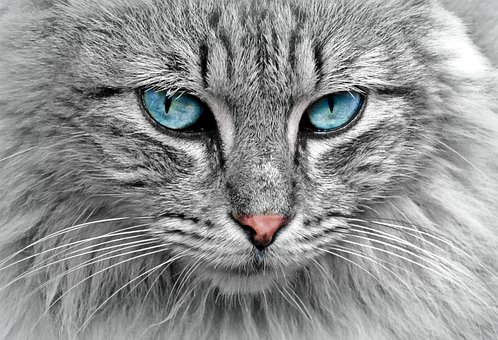

1/1 [==============================] - 1s 586ms/step
[[ 2.4664397 -1.4790306]]
0
The image represents a Cat


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog.jpg


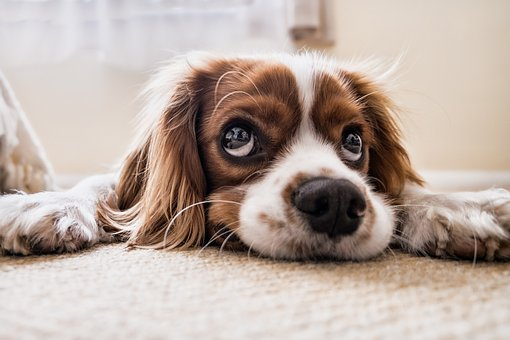

1/1 [==============================] - 0s 69ms/step
[[-3.263632  3.088191]]
1
The image represents a Dog


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')